In [1]:
# import required package for data handling
import pandas as pd
import numpy as np

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [2]:
# Create dataframe and fill missing values
#columns=[I1, I2, I3, P_IPO,P_H,P_L,P_1Day,C1,C2,C3,C4]
IPO_df = pd.read_csv('Competition1_raw_data.csv', header=0, na_values=['-'])
IPO_df.head()

I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.0  
1  19585.0  510.0  1120.0  71.0  242.0  237.0  
2   4785.0  128.0   325.0  61.0   33.0   60.0  
3   7574.0  177.0   509.0  80.0   59.0  110.0  
4  13176.0  336.0   720.0  67.0  149.0  167.0  

[5 rows x 22 columns]

#### Data Exploration

In [3]:
# Column names
IPO_df.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'],
      dtype='object')

In [4]:
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


Our dataframe has 682 rows and 22 columns. The datatypes for three columns is object and rest are float.   
There are missing values in columns I3, P(IPO), P(H), P(L), P(1Day), C1, C2, C3, C4, C5, C6, C7, T1, T2, T3, T4, T5, S1, S2, S3

In [5]:
# Change C2 datatype to bool as per the data dictionary.
IPO_df['C2'] = IPO_df['C2'].astype('bool')

In [6]:
pd.options.mode.use_inf_as_na = True

#### Impute with mean for continuous data and mode for categorical data

In [7]:
# Replace the missing data with mean
IPO_df['P(IPO)'].fillna(IPO_df['P(IPO)'].mean(), inplace = True)
IPO_df['P(H)'].fillna(IPO_df['P(H)'].mean(), inplace = True)
IPO_df['P(L)'].fillna(IPO_df['P(L)'].mean(), inplace = True)
IPO_df['P(1Day)'].fillna(IPO_df['P(1Day)'].mean(), inplace = True)
IPO_df['C1'].fillna(IPO_df['C1'].mean(), inplace = True)
IPO_df['C3'].fillna(IPO_df['C3'].mean(), inplace = True)
IPO_df['C4'].fillna(IPO_df['C4'].mean(), inplace = True)
IPO_df['C5'].fillna(IPO_df['C5'].mean(), inplace = True)
IPO_df['C6'].fillna(IPO_df['C6'].mean(), inplace = True)
IPO_df['C7'].fillna(IPO_df['C7'].mean(), inplace = True)
IPO_df['T1'].fillna(IPO_df['T1'].mean(), inplace = True)
IPO_df['T2'].fillna(IPO_df['T2'].mean(), inplace = True)
IPO_df['T3'].fillna(IPO_df['T3'].mean(), inplace = True)
IPO_df['T4'].fillna(IPO_df['T4'].mean(), inplace = True)
IPO_df['T5'].fillna(IPO_df['T5'].mean(), inplace = True)
IPO_df['S1'].fillna(IPO_df['S1'].mean(), inplace = True)
IPO_df['S2'].fillna(IPO_df['S2'].mean(), inplace = True)
IPO_df['S3'].fillna(IPO_df['S3'].mean(), inplace = True)

# Replace the missing data with mode
IPO_df['C2'].fillna(IPO_df['C2'].mean(), inplace = True)

# Imputation using fillna with chaining method and and then selecting the top category, which is the mode, with the `.index` attribute
IPO_df['I3'].fillna(IPO_df['I3'].value_counts().index[0], inplace=True)

IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null bool
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T2         682 non-null float64
T3         682 non-null float64
T4         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
dtypes: bool(1), float64(18), object(3)
memory usage: 112.6+ KB


In [8]:
IPO_df.describe()

P(IPO)        P(H)        P(L)      P(1Day)           C1  \
count  682.000000  682.000000  682.000000   682.000000   682.000000   
mean    13.837666   15.481190   13.515045    25.934766   149.728788   
std      6.031467    6.604398    5.792641    72.042293   150.328785   
min      3.000000    0.000000    3.000000     0.000000    10.000000   
25%     10.000000   13.000000   11.000000    11.092500    85.000000   
50%     13.500000   15.481190   13.000000    15.000000   110.000000   
75%     17.000000   17.000000   15.000000    21.030001   152.750000   
max     85.000000  135.000000  108.000000  1159.200562  2087.000000   

                C3          C4            C5            C6            C7  \
count   682.000000  682.000000  6.820000e+02  6.820000e+02    682.000000   
mean      1.788904    0.007282  4.935776e+07  1.241519e+07    500.459962   
std     158.308600    0.032775  1.039156e+08  2.501761e+07   1558.767222   
min    -786.239000   -0.162352  3.693227e+06  5.250000e+05      0.074000   
25%      -0.750000   -0.013352  1.874682e+07  5.004180e+06     41.511500   
50%       0.070000    0.007282  2.759165e+07  7.500000e+06    134.738000   
75%       0.600000    0.030941  4.938184e+07  1.208721e+07    500.459962   
max    3864.500000    0.092896  2.138085e+09  4.212336e+08  30683.000000   

                T1            T2            T3           T4            T5  \
count   682.000000    682.000000    682.000000   682.000000    682.000000   
mean    465.634361  12758.606461  11395.844347   294.353891    679.220264   
std     175.612567   5445.641920   4836.115518   121.443374    472.566975   
min     132.000000      0.000000      0.000000     0.000000     -1.000000   
25%     351.250000   9195.750000   8168.000000   213.250000    462.250000   
50%     444.500000  12047.000000  10789.000000   279.500000    624.500000   
75%     550.750000  15240.250000  13751.500000   353.750000    794.500000   
max    1750.000000  49056.000000  43952.000000  1058.000000  10277.000000   

               S1          S2          S3  
count  682.000000  682.000000  682.000000  
mean    68.421439  120.104258  144.759178  
std     39.067810   84.766654   69.225403  
min     -1.000000   20.000000   26.000000  
25%     45.000000   73.000000  100.000000  
50%     60.000000  100.500000  134.000000  
75%     84.750000  141.750000  173.000000  
max    309.000000  944.000000  883.000000

#### Handling Outliers

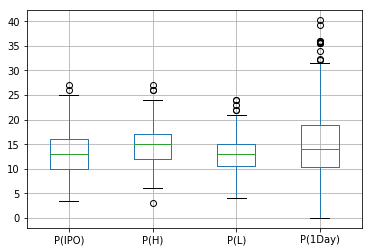

In [45]:
IPO_df.boxplot(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'])

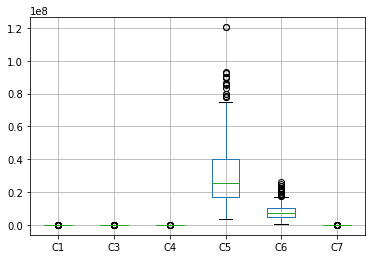

In [46]:
IPO_df.boxplot(['C1', 'C3', 'C4','C5', 'C6', 'C7'])

In [47]:
# Seperate the continuous variables for removing skewness in distribution.
df_num = IPO_df.select_dtypes(include=["float"])
df_cat = IPO_df.select_dtypes(exclude=["float"])

In [48]:
# Removing outliers from the data using InterQuartilRange
Q1 = df_num.quantile(0.20)
Q3 = df_num.quantile(0.80)
IQR = Q3 - Q1
idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)
IPO_df = pd.concat([df_num.loc[idx], df_cat.loc[idx]], axis=1)

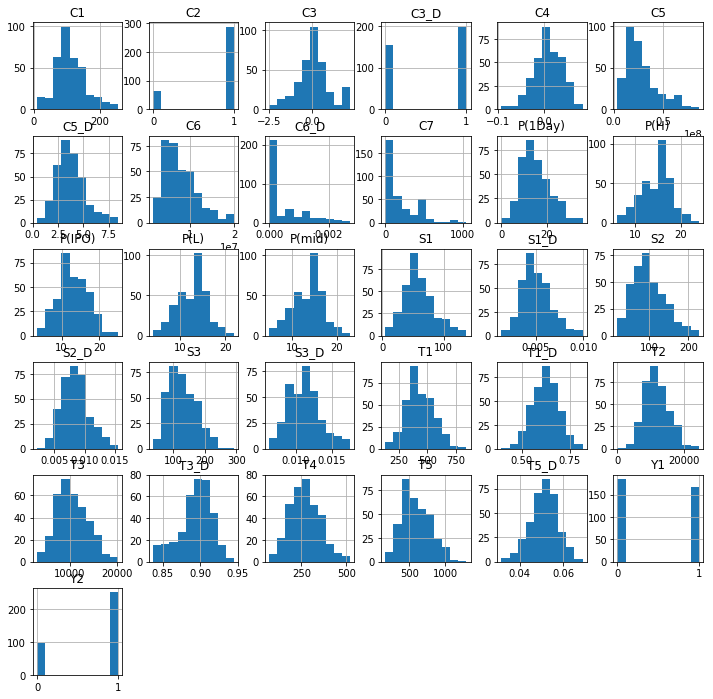

In [49]:
# Plot histogram to see the skewness/distribution of each column
pd.DataFrame.hist(IPO_df, figsize = [12,12]);

#### Add variables using existing data based on the data dictionary.

###### Derive new variables from existing variable and by creating dummy variables.

In [50]:
# Add Positive EPS dummy column C3_D with dummy variable set to 1 if C3 is positive, otherwise 0. 
IPO_df['C3_D'] = pd.get_dummies(IPO_df.C3 > 0, drop_first=True, dtype=bool)

# Add Share Overhang column C5_D.
IPO_df['C5_D']=IPO_df['C5']/IPO_df['C6']

# Add Up Revision column C6_D.
IPO_df['P(mid)'] = ((IPO_df['P(H)']+IPO_df['P(L)'])/2)
IPO_df['C6_D'] = ((IPO_df['P(IPO)']-IPO_df['P(mid)'])/IPO_df['P(mid)']*0.01).where((IPO_df['P(IPO)'] > IPO_df['P(mid)']), 0)

In [51]:
# Create column T1_D with Percent of long sentences
IPO_df['T1_D']=IPO_df['T4']/IPO_df['T1']
# Create column T3_D with Percent of real words
IPO_df['T3_D']=IPO_df['T3']/IPO_df['T2']
# Create column T5_D with Percent of long words
IPO_df['T5_D']=IPO_df['T5']/IPO_df['T2']
# Create column S1_D with Percent of Positive words
IPO_df['S1_D']=IPO_df['S1']/IPO_df['T2']
# Create column S2_D with Percent of real words
IPO_df['S2_D']=IPO_df['S2']/IPO_df['T2']
# Create column S3_D with Percent of real words
IPO_df['S3_D']=IPO_df['S3']/IPO_df['T2']

In [52]:
# Replace the missing data with mean
IPO_df['T3_D'].fillna(IPO_df['T3_D'].mean(), inplace = True)
IPO_df['T5_D'].fillna(IPO_df['T5_D'].mean(), inplace = True)
IPO_df['S1_D'].fillna(IPO_df['S1_D'].mean(), inplace = True)
IPO_df['S2_D'].fillna(IPO_df['S2_D'].mean(), inplace = True)
IPO_df['S3_D'].fillna(IPO_df['S3_D'].mean(), inplace = True)
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 34 columns):
P(IPO)     351 non-null float64
P(H)       351 non-null float64
P(L)       351 non-null float64
P(1Day)    351 non-null float64
C1         351 non-null float64
C3         351 non-null float64
C4         351 non-null float64
C5         351 non-null float64
C6         351 non-null float64
C7         351 non-null float64
T1         351 non-null float64
T2         351 non-null float64
T3         351 non-null float64
T4         351 non-null float64
T5         351 non-null float64
S1         351 non-null float64
S2         351 non-null float64
S3         351 non-null float64
C5_D       351 non-null float64
P(mid)     351 non-null float64
C6_D       351 non-null float64
T1_D       351 non-null float64
T3_D       351 non-null float64
T5_D       351 non-null float64
S1_D       351 non-null float64
S2_D       351 non-null float64
S3_D       351 non-null float64
I1         351 non-null object


##### Adding Target Variables

In [53]:
# Add Pre-IPO Price Revision column Y1.
IPO_df['Y1'] = np.where(IPO_df['P(IPO)'] < ((IPO_df['P(H)'] + IPO_df['P(L)'])/2), '1', '0')
IPO_df['Y1'] = IPO_df['Y1'].astype('int')

#Add Post-IPO Initial Return column Y2.
IPO_df['Y2'] = np.where(IPO_df['P(IPO)'] < IPO_df['P(1Day)'], '1', '0')
IPO_df['Y2'] = IPO_df['Y2'].astype('int')

IPO_df.info()
#df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 34 columns):
P(IPO)     351 non-null float64
P(H)       351 non-null float64
P(L)       351 non-null float64
P(1Day)    351 non-null float64
C1         351 non-null float64
C3         351 non-null float64
C4         351 non-null float64
C5         351 non-null float64
C6         351 non-null float64
C7         351 non-null float64
T1         351 non-null float64
T2         351 non-null float64
T3         351 non-null float64
T4         351 non-null float64
T5         351 non-null float64
S1         351 non-null float64
S2         351 non-null float64
S3         351 non-null float64
C5_D       351 non-null float64
P(mid)     351 non-null float64
C6_D       351 non-null float64
T1_D       351 non-null float64
T3_D       351 non-null float64
T5_D       351 non-null float64
S1_D       351 non-null float64
S2_D       351 non-null float64
S3_D       351 non-null float64
I1         351 non-null object


##### Seperating source data and target variables

In [54]:
# Create dataframe 'var_df' for the preditive data
var_df = IPO_df.iloc[:,:-2]

# a dataframe 'target' for the target variables.
target = IPO_df.iloc[:,-2:]

var_df.columns

Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7',
       'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C5_D', 'P(mid)',
       'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D', 'S2_D', 'S3_D', 'I1', 'I2',
       'I3', 'C2', 'C3_D'],
      dtype='object')

#### Replacing tuple values in 'I3' column with zero

In [55]:
# Check for the number of null-values in I3 column
var_df.I3.isnull().values.sum()

0

In [56]:
var_df['I3'].value_counts()

2834                38
7372                33
3674                18
3841                17
7389                16
1311                 9
3845                 9
7371                 7
5812                 6
7373                 6
4412                 6
3661                 5
7359                 5
4899                 4
5600                 4
8731                 4
7374                 4
2836                 4
8742                 4
3572                 4
2860                 4
7379                 3
4911                 3
3571                 3
3825                 3
8200                 3
3663                 3
6324                 3
3842                 3
4512                 2
                    ..
2711                 1
7389, 5063           1
8011                 1
3999                 1
4941                 1
3629                 1
3663, 3861, 6794     1
7830                 1
4813                 1
5945                 1
5810                 1
4581                 1
3100       

In [57]:
# check the value in column contains ',', if so then replace the whole value as '0'
var_df.I3[var_df.I3.str.contains(",")] = '0'
var_df.I3[var_df.I3.str.contains(" ")] = '0'

# look at the value counts to see if they are changed
var_df['I3'].value_counts()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2834    38
7372    33
3674    18
3841    17
7389    16
1311     9
3845     9
7371     7
5812     6
7373     6
4412     6
3661     5
7359     5
4899     4
5600     4
8731     4
7374     4
2836     4
8742     4
2860     4
3572     4
6324     3
3571     3
7379     3
3825     3
8200     3
3842     3
0        3
4911     3
3663     3
        ..
7384     1
3531     1
2750     1
2711     1
8011     1
3999     1
4941     1
7830     1
5945     1
3440     1
4813     1
5810     1
4581     1
3100     1
4400     1
3629     1
8082     1
5531     1
5499     1
4931     1
1446     1
2835     1
3990     1
3140     1
3822     1
7311     1
3081     1
5641     1
5149     1
5400     1
Name: I3, Length: 127, dtype: int64

In [58]:
# Changing I3 datatype to float
var_df['I3'] = var_df['I3'].astype('float')

#### Binning the variable 'I3'

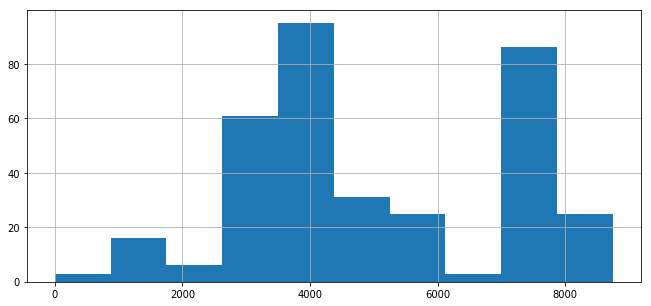

In [59]:
# Check distribution of the data in I3 column for binning.
pd.Series.hist(var_df['I3'], figsize = [11,5]);

In [60]:
# Binning I3 data into four classes based on below range for each class
def assign_label(df_I3):
    if df_I3 > 0 and df_I3 < 4000:
        return 1
    elif df_I3 >= 4000 and df_I3 < 6000:
        return 2
    elif df_I3 >= 6000 and df_I3 < 10000:
        return 3
    elif df_I3 >= 10000:
        return 4
      
var_df['I3'] = var_df['I3'].apply(assign_label)    
dummy_df = pd.get_dummies(var_df['I3'], prefix='Class')
df1 = pd.concat([var_df, dummy_df], axis=1)

df1.head()

P(IPO)      P(H)       P(L)    P(1Day)          C1        C3        C4  \
3   11.500000  16.00000  14.000000  12.390000  209.000000 -0.910000  0.020023   
6    6.000000  13.00000  11.000000   6.720000  128.000000 -1.870000  0.004106   
8   15.000000  18.00000  16.000000  15.900000  100.000000 -0.510000 -0.029316   
9    9.000000  19.00000  17.000000   0.000000  106.000000  1.490000 -0.024925   
10  13.837666  15.48119  13.515045  25.934766  149.728788  1.788904  0.007282   

              C5            C6          C7    ...          S2_D      S3_D  \
3   1.484864e+07  4.500000e+06    8.526000    ...      0.007144  0.013319   
6   1.904702e+07  5.500000e+06    5.146000    ...      0.006727  0.008567   
8   5.298250e+07  1.100000e+07  279.600000    ...      0.008371  0.015797   
9   3.362269e+07  1.100000e+07  494.008000    ...      0.009853  0.016094   
10  4.935776e+07  1.241519e+07  500.459962    ...      0.008628  0.009822   

      I1                             I2   I3    C2   C3_D  Class_1.0  \
3   ACHN  ACHILLION PHARMACEUTICALS INC  1.0  True  False          1   
6   ACOR        ACORDA THERAPEUTICS INC  1.0  True  False          1   
8   ACTV             ACTIVE NETWORK INC  3.0  True  False          0   
9    ACW                  ACCURIDE CORP  1.0  True   True          1   
10  ADKU     ADCARE HEALTH SYSTEMS, INC  1.0  True   True          1   

    Class_2.0  Class_3.0  
3           0          0  
6           0          0  
8           0          1  
9           0          0  
10          0          0  

[5 rows x 35 columns]

##### Droping the redundant columns

In [61]:
drop_cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)','I1','I2', 'I3', 'C3', 'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

In [62]:
# Drop columns 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)','I1','I2', 'I3', 'C3', 'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'
df = df1.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 15 columns):
C1           351 non-null float64
C7           351 non-null float64
C5_D         351 non-null float64
C6_D         351 non-null float64
T1_D         351 non-null float64
T3_D         351 non-null float64
T5_D         351 non-null float64
S1_D         351 non-null float64
S2_D         351 non-null float64
S3_D         351 non-null float64
C2           351 non-null bool
C3_D         351 non-null bool
Class_1.0    351 non-null uint8
Class_2.0    351 non-null uint8
Class_3.0    351 non-null uint8
dtypes: bool(2), float64(10), uint8(3)
memory usage: 31.9 KB


In [63]:
# Plot histogram to see the skewness/distribution of each column
#pd.DataFrame.hist(df, figsize = [12,12]);

#### Handling Skewness

In [64]:
# Remove skewness from the data using square root, log, cube root for positively skewed data.
df['C1'] = df.C1**(1/2)
df['C5_D'] = df['C5_D']**(1/2)
df['C6_D'] = np.log(df['C6_D'] +1)
df['C7'] = df.C7**(1/3)
df['S1_D'] = df['S1_D']**(1/2)
df['S2_D'] = df['S2_D']**(1/2)
df['S3_D'] = df['S3_D']**(1/2)

# Remove skewness from the data using square for negatively skewed data.
df['T1_D'] = df['T1_D']**(2)
df['T3_D'] = df['T3_D']**(2)
df['T5_D'] = df['T5_D']**(2)

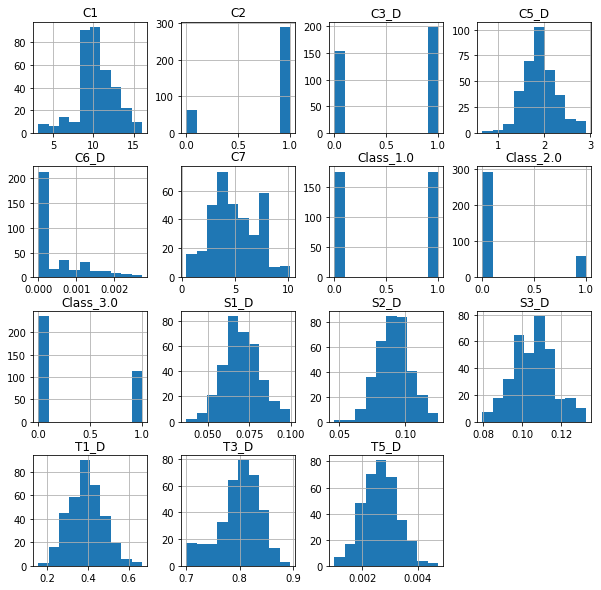

In [65]:
# Check skewness with histogram plot for each column
pd.DataFrame.hist(df, figsize = [10,10]);

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 15 columns):
C1           351 non-null float64
C7           351 non-null float64
C5_D         351 non-null float64
C6_D         351 non-null float64
T1_D         351 non-null float64
T3_D         351 non-null float64
T5_D         351 non-null float64
S1_D         351 non-null float64
S2_D         351 non-null float64
S3_D         351 non-null float64
C2           351 non-null bool
C3_D         351 non-null bool
Class_1.0    351 non-null uint8
Class_2.0    351 non-null uint8
Class_3.0    351 non-null uint8
dtypes: bool(2), float64(10), uint8(3)
memory usage: 31.9 KB


In [67]:
# Replace the missing data with mean
df['S1_D'].fillna(df['S1_D'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 15 columns):
C1           351 non-null float64
C7           351 non-null float64
C5_D         351 non-null float64
C6_D         351 non-null float64
T1_D         351 non-null float64
T3_D         351 non-null float64
T5_D         351 non-null float64
S1_D         351 non-null float64
S2_D         351 non-null float64
S3_D         351 non-null float64
C2           351 non-null bool
C3_D         351 non-null bool
Class_1.0    351 non-null uint8
Class_2.0    351 non-null uint8
Class_3.0    351 non-null uint8
dtypes: bool(2), float64(10), uint8(3)
memory usage: 31.9 KB


#### Data Normalization and Data Scaling

In [68]:
# Seperate continuous data for data scaling and data normalization
data_num = df.select_dtypes(include=['float'])
data_cat = df.select_dtypes(exclude=['float'])

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.pipeline import Pipeline

scaler= MinMaxScaler()
scaler.fit_transform(data_num)

#Normalize data
normalize(data_num, norm='l1', axis=1, copy=True)

data1 = pd.concat([data_num, data_cat], axis=1)

data1.describe()

C1          C7        C5_D        C6_D        T1_D        T3_D  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean    10.322183    4.966322    1.910519    0.000460    0.390826    0.800014   
std      2.326940    2.155813    0.360461    0.000680    0.085501    0.038233   
min      3.162278    0.419834    0.668679    0.000000    0.156405    0.700841   
25%      9.165151    3.388815    1.680302    0.000000    0.329712    0.780992   
50%     10.198039    4.584970    1.904315    0.000000    0.390978    0.803681   
75%     11.810993    6.720620    2.138381    0.000769    0.440174    0.827264   
max     16.031220   10.150982    2.907206    0.002724    0.664364    0.893935   

             T5_D        S1_D        S2_D        S3_D   Class_1.0   Class_2.0  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.002641    0.070446    0.091386    0.105713    0.501425    0.165242   
std      0.000637    0.010892    0.012297    0.010526    0.500712    0.371929   
min      0.000998    0.037268    0.046394    0.079744    0.000000    0.000000   
25%      0.002188    0.063186    0.082185    0.097913    0.000000    0.000000   
50%      0.002595    0.069673    0.091509    0.106234    1.000000    0.000000   
75%      0.003044    0.077637    0.099266    0.112702    1.000000    0.000000   
max      0.004725    0.099527    0.124757    0.132524    1.000000    1.000000   

        Class_3.0  
count  351.000000  
mean     0.324786  
std      0.468963  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [69]:
# Change the datatypes for Y1 and Y2 to bool.
target['Y1'] = target['Y1'].astype('bool')
target['Y2'] = target['Y2'].astype('bool')

In [70]:
# Change the datatypes for Class_1.0, Class_2.0 and Class_3.0 to float.
data1['Class_1.0'] = data1['Class_1.0'].astype('float')
data1['Class_2.0'] = data1['Class_2.0'].astype('float')
data1['Class_3.0'] = data1['Class_3.0'].astype('float')

In [71]:
# Add target variables into our dataframe
result_df = pd.concat([data1, target], axis=1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 3 to 680
Data columns (total 17 columns):
C1           351 non-null float64
C7           351 non-null float64
C5_D         351 non-null float64
C6_D         351 non-null float64
T1_D         351 non-null float64
T3_D         351 non-null float64
T5_D         351 non-null float64
S1_D         351 non-null float64
S2_D         351 non-null float64
S3_D         351 non-null float64
C2           351 non-null bool
C3_D         351 non-null bool
Class_1.0    351 non-null float64
Class_2.0    351 non-null float64
Class_3.0    351 non-null float64
Y1           351 non-null bool
Y2           351 non-null bool
dtypes: bool(4), float64(13)
memory usage: 39.8 KB


#### Feature Selection using Correlation Analysis

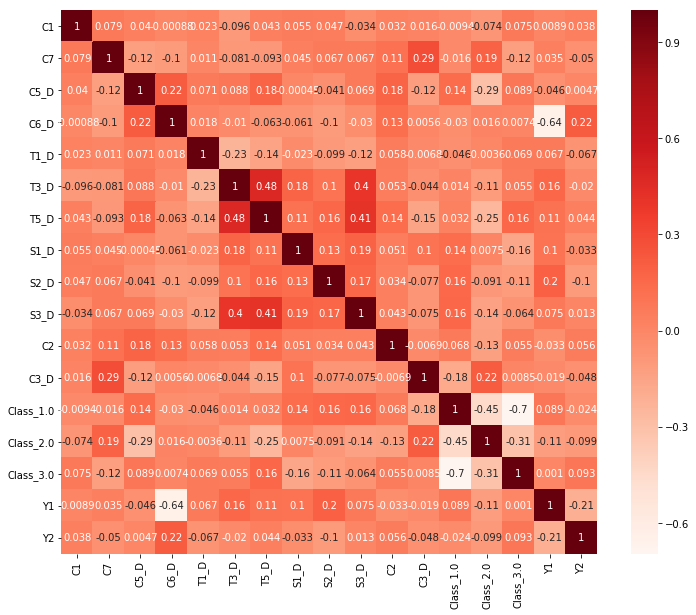

In [72]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = result_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [73]:
#Correlation with output variable Y1
cor_target1 = abs(cor["Y1"])
#Remove highly correlated features
features1 = cor_target1[cor_target1>0.5]
features1

C6_D    0.641665
Y1      1.000000
Name: Y1, dtype: float64

In [74]:
#Correlation with output variable Y1
cor_target2 = abs(cor["Y2"])
#Remove highly correlated features
features2 = cor_target2[cor_target2>0.5]
features2

Y2    1.0
Name: Y2, dtype: float64

C6_D is highly correlated for Y1 but not for Y2. Hence, we select all our variables based on Correlation AnalysisWe keep all the variables 

In [75]:
#Feature Matrix
X1 = result_df.drop(columns = ['Y1', 'Y2'])

#Target Variables
y1 = result_df['Y1']          
y2 = result_df['Y2']

X1.columns

Index(['C1', 'C7', 'C5_D', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D', 'S2_D',
       'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0', 'Class_3.0'],
      dtype='object')

##### FEATURE SELECTION USING RFE

In [76]:
# Import ther necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [77]:
cols = list(X1.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False  True False  True  True False False  True False False False
  True  True  True]
[9 6 1 5 1 1 8 3 1 4 2 7 1 1 1]
Index(['C5_D', 'T1_D', 'T3_D', 'S2_D', 'Class_1.0', 'Class_2.0', 'Class_3.0'], dtype='object')


In [78]:
cols = list(X1.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 9)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False False False  True  True False False  True  True  True  True
  True  True  True]
[3 4 2 5 1 1 6 7 1 1 1 1 1 1 1]
Index(['T1_D', 'T3_D', 'S2_D', 'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0',
       'Class_3.0'],
      dtype='object')


In [79]:
result_df.columns

Index(['C1', 'C7', 'C5_D', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D', 'S2_D',
       'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0', 'Class_3.0', 'Y1',
       'Y2'],
      dtype='object')

In [80]:
result_df.to_csv('out.csv', index=False)